<center>

### CS-GY 9223: Intro To Responsible AI

### Fairness Audit of Student Performance Prediction Model
</center>

<center>

Laxman Singh Rawat      |       Nikhil Mahana       |       Yathin Reddy Duvuru

</center>

Introduction

#### Dataset Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

| Attribute | Description | Domain |
|-----------|-------------|---------|
| **sex** | Student's sex | Binary: female or male |
| **age** | Student's age | Numeric: from 15 to 22 |
| **school** | Student's school | Binary: Gabriel Pereira or Mousinho da Silveira |
| **address** | Student's home address type | Binary: urban or rural |
| **Pstatus** | Parent's cohabitation status | Binary: living together or apart |
| **Medu** | Mother's education | Numeric: from 0 to 4ᵃ |
| **Mjob** | Mother's job | Nominalᵇ |
| **Fedu** | Father's education | Numeric: from 0 to 4ᵃ |
| **Fjob** | Father's job | Nominalᵇ |
| **guardian** | Student's guardian | Nominal: mother, father or other |
| **famsize** | Family size | Binary: ≤ 3 or > 3 |
| **famrel** | Quality of family relationships | Numeric: from 1 (very bad) to 5 (excellent) |
| **reason** | Reason to choose this school | Nominal: close to home, school reputation, course preference or other |
| **traveltime** | Home to school travel time | Numeric: 1 (< 15 min.), 2 (15 to 30 min.), 3 (30 min. to 1 hour) or 4 (> 1 hour) |
| **studytime** | Weekly study time | Numeric: 1 (< 2 hours), 2 (2 to 5 hours), 3 (5 to 10 hours) or 4 (> 10 hours) |
| **failures** | Number of past class failures | Numeric: n if 1 ≤ n < 3, else 4 |
| **schoolsup** | Extra educational school support | Binary: yes or no |
| **famsup** | Family educational support | Binary: yes or no |
| **activities** | Extra-curricular activities | Binary: yes or no |
| **paidclass** | Extra paid classes | Binary: yes or no |
| **internet** | Internet access at home | Binary: yes or no |
| **nursery** | Attended nursery school | Binary: yes or no |
| **higher** | Wants to take higher education | Binary: yes or no |
| **romantic** | With a romantic relationship | Binary: yes or no |
| **freetime** | Free time after school | Numeric: from 1 (very low) to 5 (very high) |
| **goout** | Going out with friends | Numeric: from 1 (very low) to 5 (very high) |
| **Walc** | Weekend alcohol consumption | Numeric: from 1 (very low) to 5 (very high) |
| **Dalc** | Workday alcohol consumption | Numeric: from 1 (very low) to 5 (very high) |
| **health** | Current health status | Numeric: from 1 (very bad) to 5 (very good) |
| **absences** | Number of school absences | Numeric: from 0 to 93 |
| **G1** | First period grade | Numeric: from 0 to 20 |
| **G2** | Second period grade | Numeric: from 0 to 20 |
| **G3** | Final grade | Numeric: from 0 to 20 |

**Notes:**
- ᵃ Education levels: 0 (none), 1 (primary education - 4th grade), 2 (5th to 9th grade), 3 (secondary education), 4 (higher education)
- ᵇ Nominal job categories include: teacher, health care related, civil services, at_home, or other

In [19]:
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import matplotlib.ticker as ticker  # For formatting the ticks on the axes of plots
import seaborn as sn  # For statistical data visualization based on matplotlib
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing and handling arrays

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
import sklearn.metrics as skm  # For evaluating the performance of machine learning models
from sklearn.model_selection import cross_val_score  # For cross-validation of models

# Fairlearn for fairness metrics
from fairlearn.metrics import MetricFrame  # For creating a frame of metrics for fairness evaluation
from fairlearn.metrics import demographic_parity_difference, demographic_parity_ratio, selection_rate  # For measuring demographic parity
from fairlearn.metrics import false_negative_rate, false_positive_rate  # For measuring false negative and positive rates

# UCI ML Repository for fetching datasets
from ucimlrepo import fetch_ucirepo  # For accessing datasets from the UCI Machine Learning Repository

# IPython display for output control
from IPython.display import clear_output  # For clearing the output of the current cell

import math

In [5]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 


In [6]:
# metadata 
print(student_performance.metadata) 

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [7]:
# variable information 
print(student_performance.variables) 

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

In [15]:
#@markdown Check missing values and data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [18]:
#@markdown Check missing values and data types
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


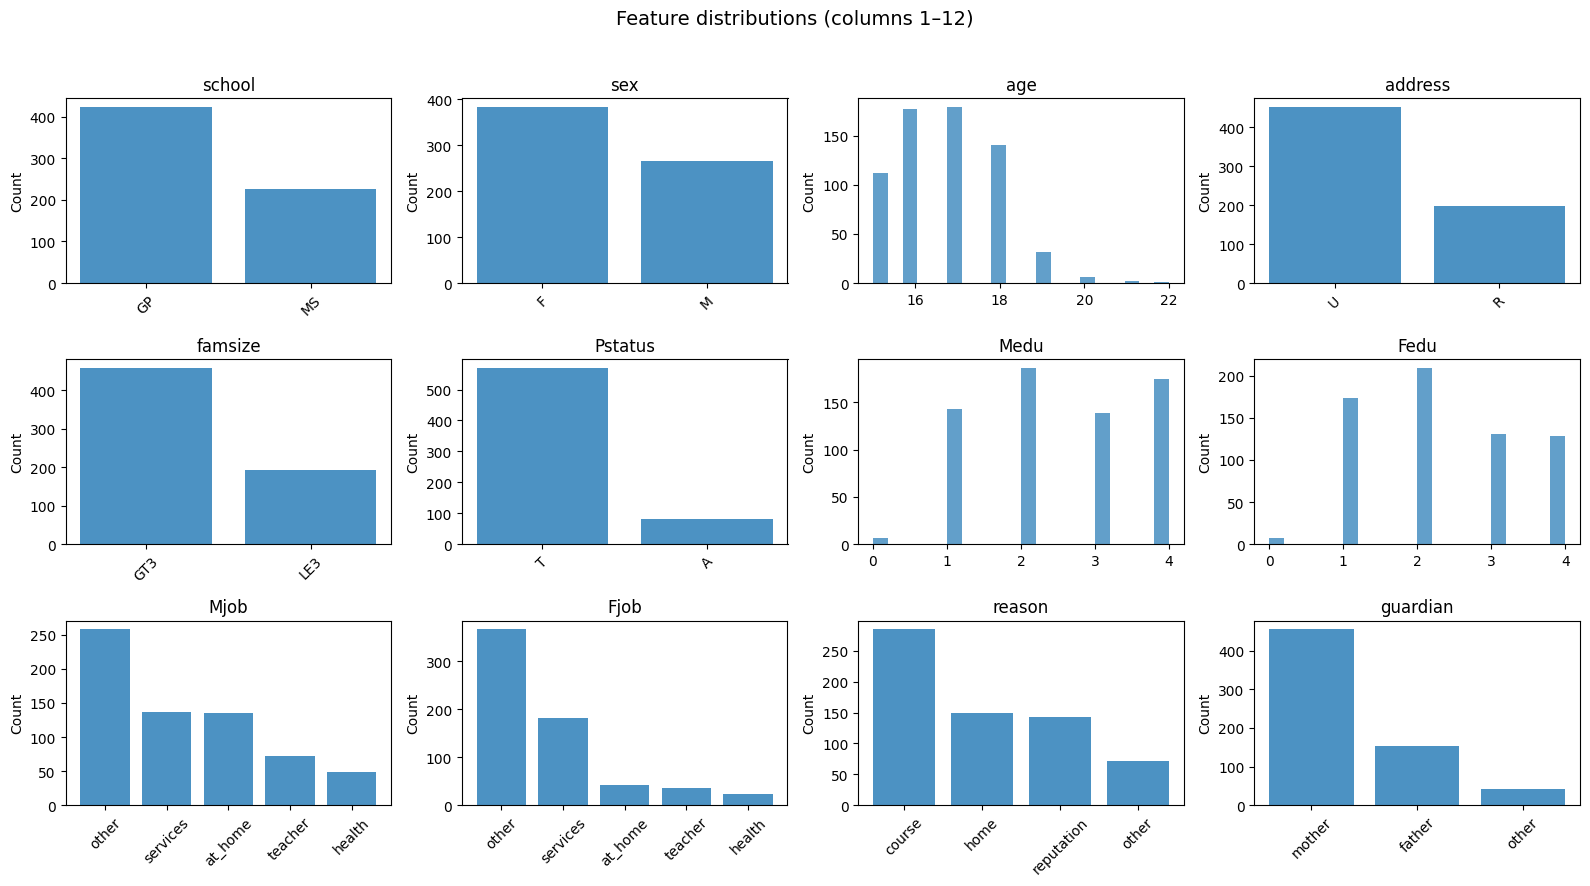

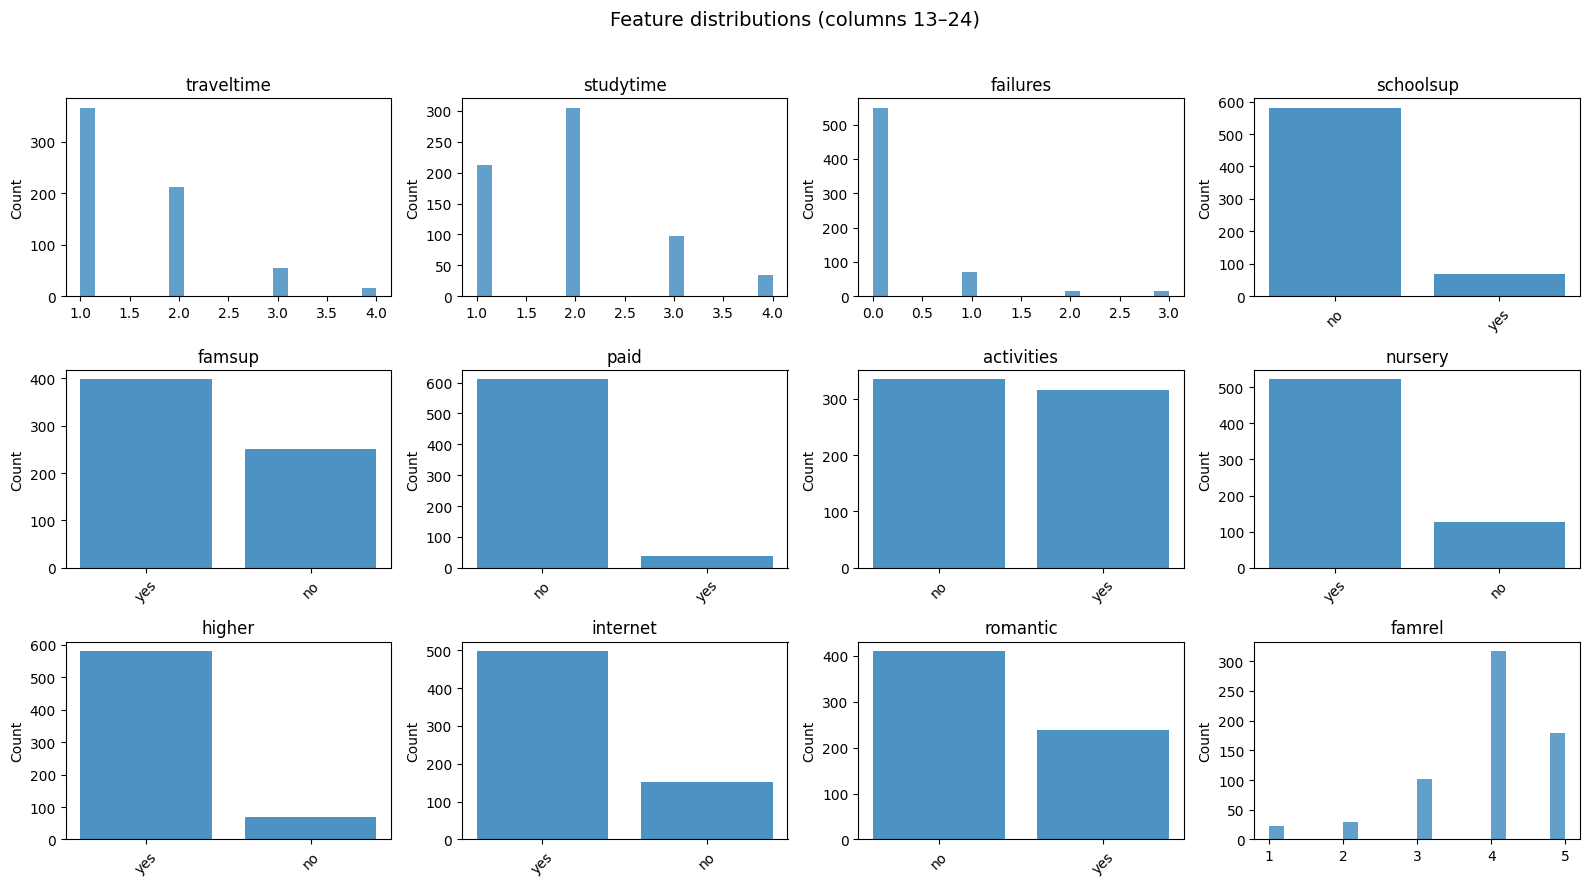

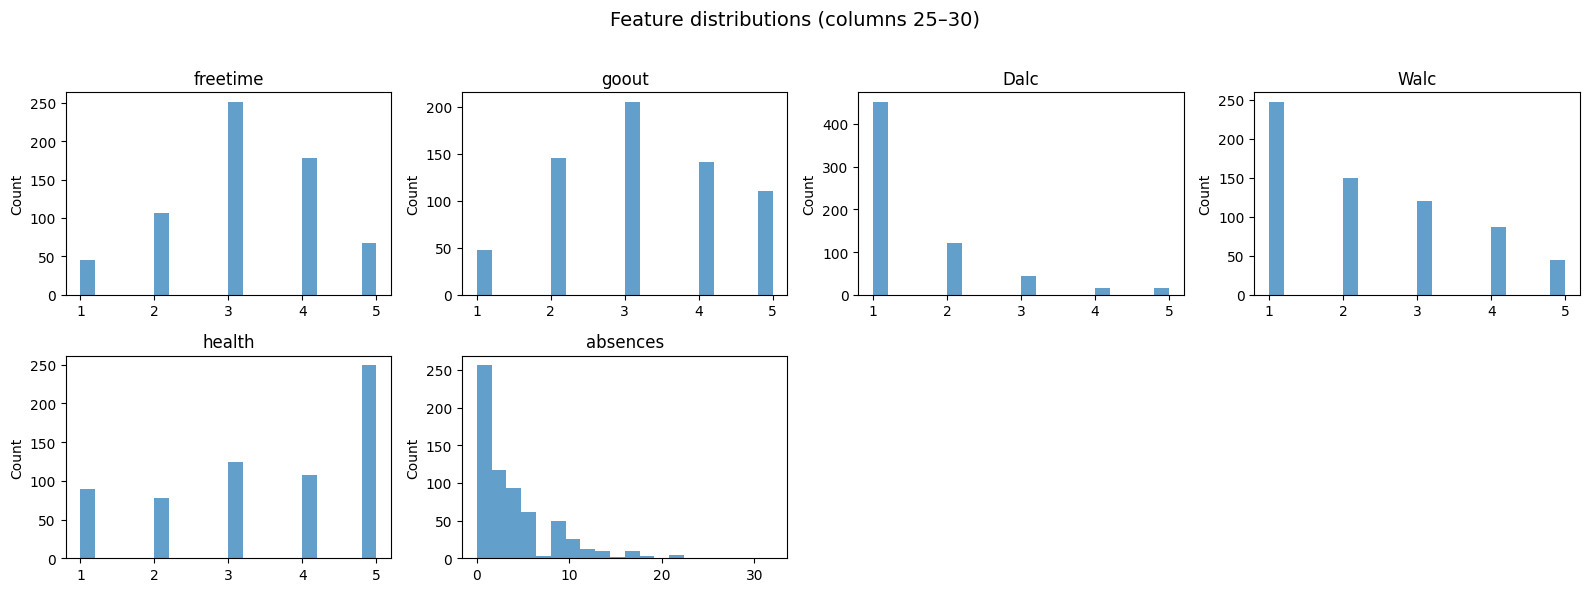

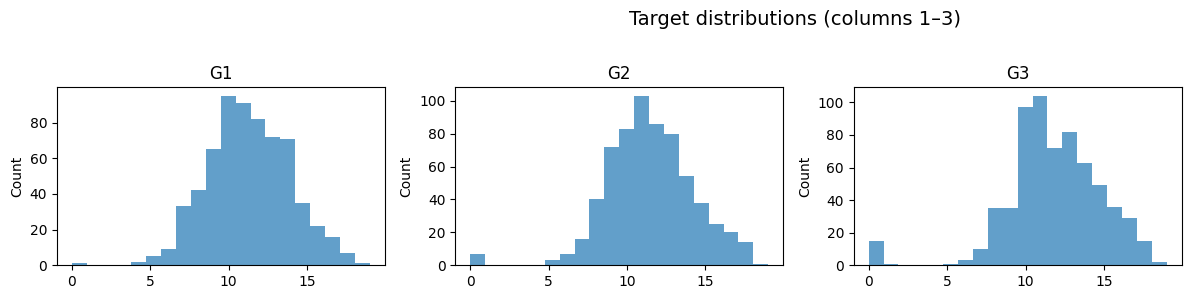

In [21]:
def plot_distributions(df, title_prefix="Features", chunk_size=12, ncols=4):
    # Accept Series or DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()
    cols = list(df.columns)
    for start in range(0, len(cols), chunk_size):
        chunk = cols[start:start+chunk_size]
        n = len(chunk)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
        axes = axes.flatten() if nrows * ncols > 1 else [axes]
        for ax_idx, col in enumerate(chunk):
            ax = axes[ax_idx]
            col_data = df[col].dropna()
            if pd.api.types.is_numeric_dtype(col_data):
                ax.hist(col_data, bins=20, color="C0", alpha=0.7)
                ax.set_ylabel("Count")
            else:
                vc = col_data.value_counts()
                ax.bar(vc.index.astype(str), vc.values, color="C0", alpha=0.8)
                ax.set_ylabel("Count")
                ax.tick_params(axis="x", rotation=45)
            ax.set_title(col)
        # remove any unused axes
        for unused_ax in axes[n:]:
            fig.delaxes(unused_ax)
        fig.suptitle(f"{title_prefix} distributions (columns {start+1}–{start+len(chunk)})", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# Plot all feature distributions in X and target(s) in y
plot_distributions(X, title_prefix="Feature")
if y is not None:
    plot_distributions(y, title_prefix="Target")
# ...existing code...

In [22]:
#@markdown Plot pairwise correlations between numeric features

sn.heatmap(X.corr(), mask=np.identity(len(X.corr())), annot=True, cmap='Blues')
plt.show()

ValueError: could not convert string to float: 'GP'